<a href="https://colab.research.google.com/github/sefahw/machine-learning-assignment/blob/main/food_production_forcast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic data for demonstration
np.random.seed(42)
num_samples = 100
average_temperature = np.random.uniform(20, 30, num_samples)
rainfall = np.random.uniform(50, 200, num_samples)
soil_ph = np.random.uniform(5, 8.5, num_samples)  # Soil pH value
organic_matter = np.random.uniform(1, 5, num_samples)  # Organic matter content in soil
crop_types = np.random.choice(['Cassava', 'Corn', 'Rice', 'Tomatoes'], num_samples)

# Calculate crop yield based on the synthetic relationship
crop_yield = 10 * average_temperature + 5 * rainfall - 3 * soil_ph + 2 * organic_matter + np.random.normal(0, 50, num_samples)

# Create a DataFrame with the generated data
data = pd.DataFrame({
    'Average_Temperature': average_temperature,
    'Rainfall': rainfall,
    'Soil_pH': soil_ph,
    'Organic_Matter': organic_matter,
    'Crop_Type': crop_types,
    'Crop_Yield': crop_yield
})

In [22]:
data.head()

,Average_Temperature,Rainfall,Soil_pH,Organic_Matter,Crop_Type,Crop_Yield
0,23.745401,54.714378,7.247111,1.206727,Cassava,507.243401
1,29.507143,145.461562,5.294490,3.125419,Corn,1086.514417
2,27.319939,97.153397,5.565700,3.162540,Cassava,791.477341
3,25.986585,126.285604,8.144940,3.549720,Cassava,865.961561
4,21.560186,186.134971,7.122502,3.904365,Corn,1131.767135


In [23]:
data.info

<bound method DataFrame.info of     Average_Temperature    Rainfall   Soil_pH  Organic_Matter Crop_Type  \
0             23.745401   54.714378  7.247111        1.206727   Cassava   
1             29.507143  145.461562  5.294490        3.125419      Corn   
2             27.319939   97.153397  5.565700        3.162540   Cassava   
3             25.986585  126.285604  8.144940        3.549720   Cassava   
4             21.560186  186.134971  7.122502        3.904365      Corn   
..                  ...         ...       ...             ...       ...   
95            24.937956  102.381436  6.827851        4.723029  Tomatoes   
96            25.227328  158.893352  7.694977        4.433651      Corn   
97            24.275410  184.566539  5.755374        2.715976  Tomatoes   
98            20.254191  183.062964  7.180117        4.003484      Rice   
99            21.078914  166.981332  5.298716        4.018171      Rice   

     Crop_Yield  
0    507.243401  
1   1086.514417  
2    791.4773

In [24]:
data.isna

<bound method DataFrame.isna of     Average_Temperature    Rainfall   Soil_pH  Organic_Matter Crop_Type  \
0             23.745401   54.714378  7.247111        1.206727   Cassava   
1             29.507143  145.461562  5.294490        3.125419      Corn   
2             27.319939   97.153397  5.565700        3.162540   Cassava   
3             25.986585  126.285604  8.144940        3.549720   Cassava   
4             21.560186  186.134971  7.122502        3.904365      Corn   
..                  ...         ...       ...             ...       ...   
95            24.937956  102.381436  6.827851        4.723029  Tomatoes   
96            25.227328  158.893352  7.694977        4.433651      Corn   
97            24.275410  184.566539  5.755374        2.715976  Tomatoes   
98            20.254191  183.062964  7.180117        4.003484      Rice   
99            21.078914  166.981332  5.298716        4.018171      Rice   

     Crop_Yield  
0    507.243401  
1   1086.514417  
2    791.4773

In [25]:
# Convert categorical 'Crop_Type' variable into numerical using one-hot encoding
data = pd.get_dummies(data, columns=['Crop_Type'], drop_first=True)
data.head()

,Average_Temperature,Rainfall,Soil_pH,Organic_Matter,Crop_Yield,Crop_Type_Corn,Crop_Type_Rice,Crop_Type_Tomatoes
0,23.745401,54.714378,7.247111,1.206727,507.243401,0,0,0
1,29.507143,145.461562,5.294490,3.125419,1086.514417,1,0,0
2,27.319939,97.153397,5.565700,3.162540,791.477341,0,0,0
3,25.986585,126.285604,8.144940,3.549720,865.961561,0,0,0
4,21.560186,186.134971,7.122502,3.904365,1131.767135,1,0,0


In [26]:
# Split the dataset into features (X) and target variable (y)
X = data.drop('Crop_Yield', axis=1)
y = data['Crop_Yield']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2195.0972970925195
R-squared: 0.959394855173068


In [27]:
import pandas as pd

# Generate new synthetic data for testing
new_data = pd.DataFrame({
    'Average_Temperature': [24.5, 28.0, 22.3],
    'Rainfall': [150.0, 180.5, 70.2],
    'Soil_pH': [6.8, 7.2, 5.5],
    'Organic_Matter': [3.2, 2.5, 4.0],
    'Crop_Type': ['Cassava', 'Corn', 'Rice']  # Crop_Type as a single column with crop names
})

# Convert 'Crop_Type' variable into numerical using one-hot encoding
new_data = pd.get_dummies(new_data, columns=['Crop_Type'], drop_first=True)

# Ensure all the possible crop type columns are included, even if not present in the specific test samples
possible_crop_types = ['Cassava', 'Corn', 'Rice','Tomatoes']
for crop_type in possible_crop_types:
    if 'Crop_Type_' + crop_type not in new_data.columns:
        new_data['Crop_Type_' + crop_type] = 0

In [28]:
new_data.head()

,Average_Temperature,Rainfall,Soil_pH,Organic_Matter,Crop_Type_Corn,Crop_Type_Rice,Crop_Type_Cassava,Crop_Type_Tomatoes
0,24.5,150.0,6.8,3.2,0,0,0,0
1,28.0,180.5,7.2,2.5,1,0,0,0
2,22.3,70.2,5.5,4.0,0,1,0,0


In [29]:
# Reorder the columns to match the training data order
new_data = new_data[X_train.columns]

# Use the trained model to predict crop yields for the new data
predictions = model.predict(new_data)

# Add the predictions to the DataFrame
new_data['Crop_Yield_Predicted'] = predictions

print(new_data)

   Average_Temperature  Rainfall  Soil_pH  Organic_Matter  Crop_Type_Corn  \
0                 24.5     150.0      6.8             3.2               0   
1                 28.0     180.5      7.2             2.5               1   
2                 22.3      70.2      5.5             4.0               0   

   Crop_Type_Rice  Crop_Type_Tomatoes  Crop_Yield_Predicted  
0               0                   0            971.440045  
1               0                   0           1149.545569  
2               1                   0            589.965746  


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

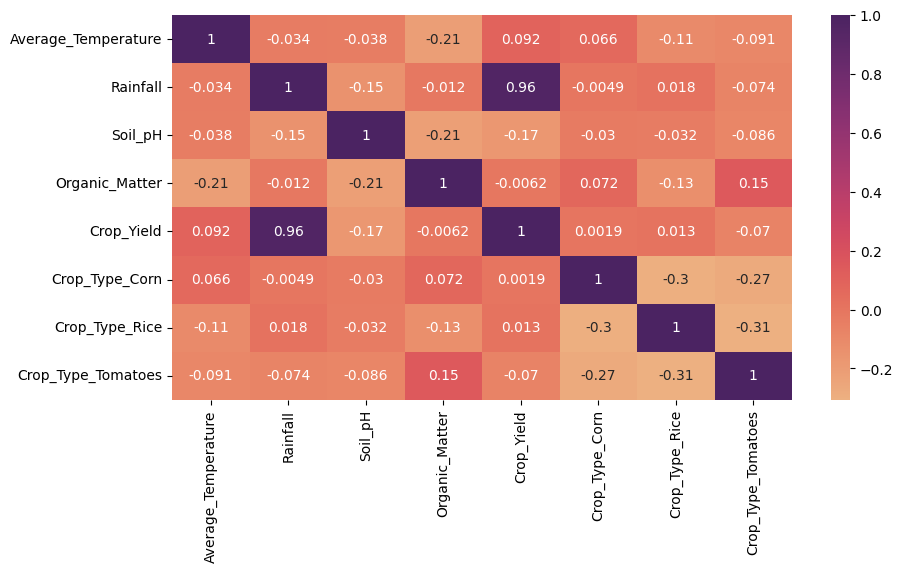

In [31]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True,cmap='flare')

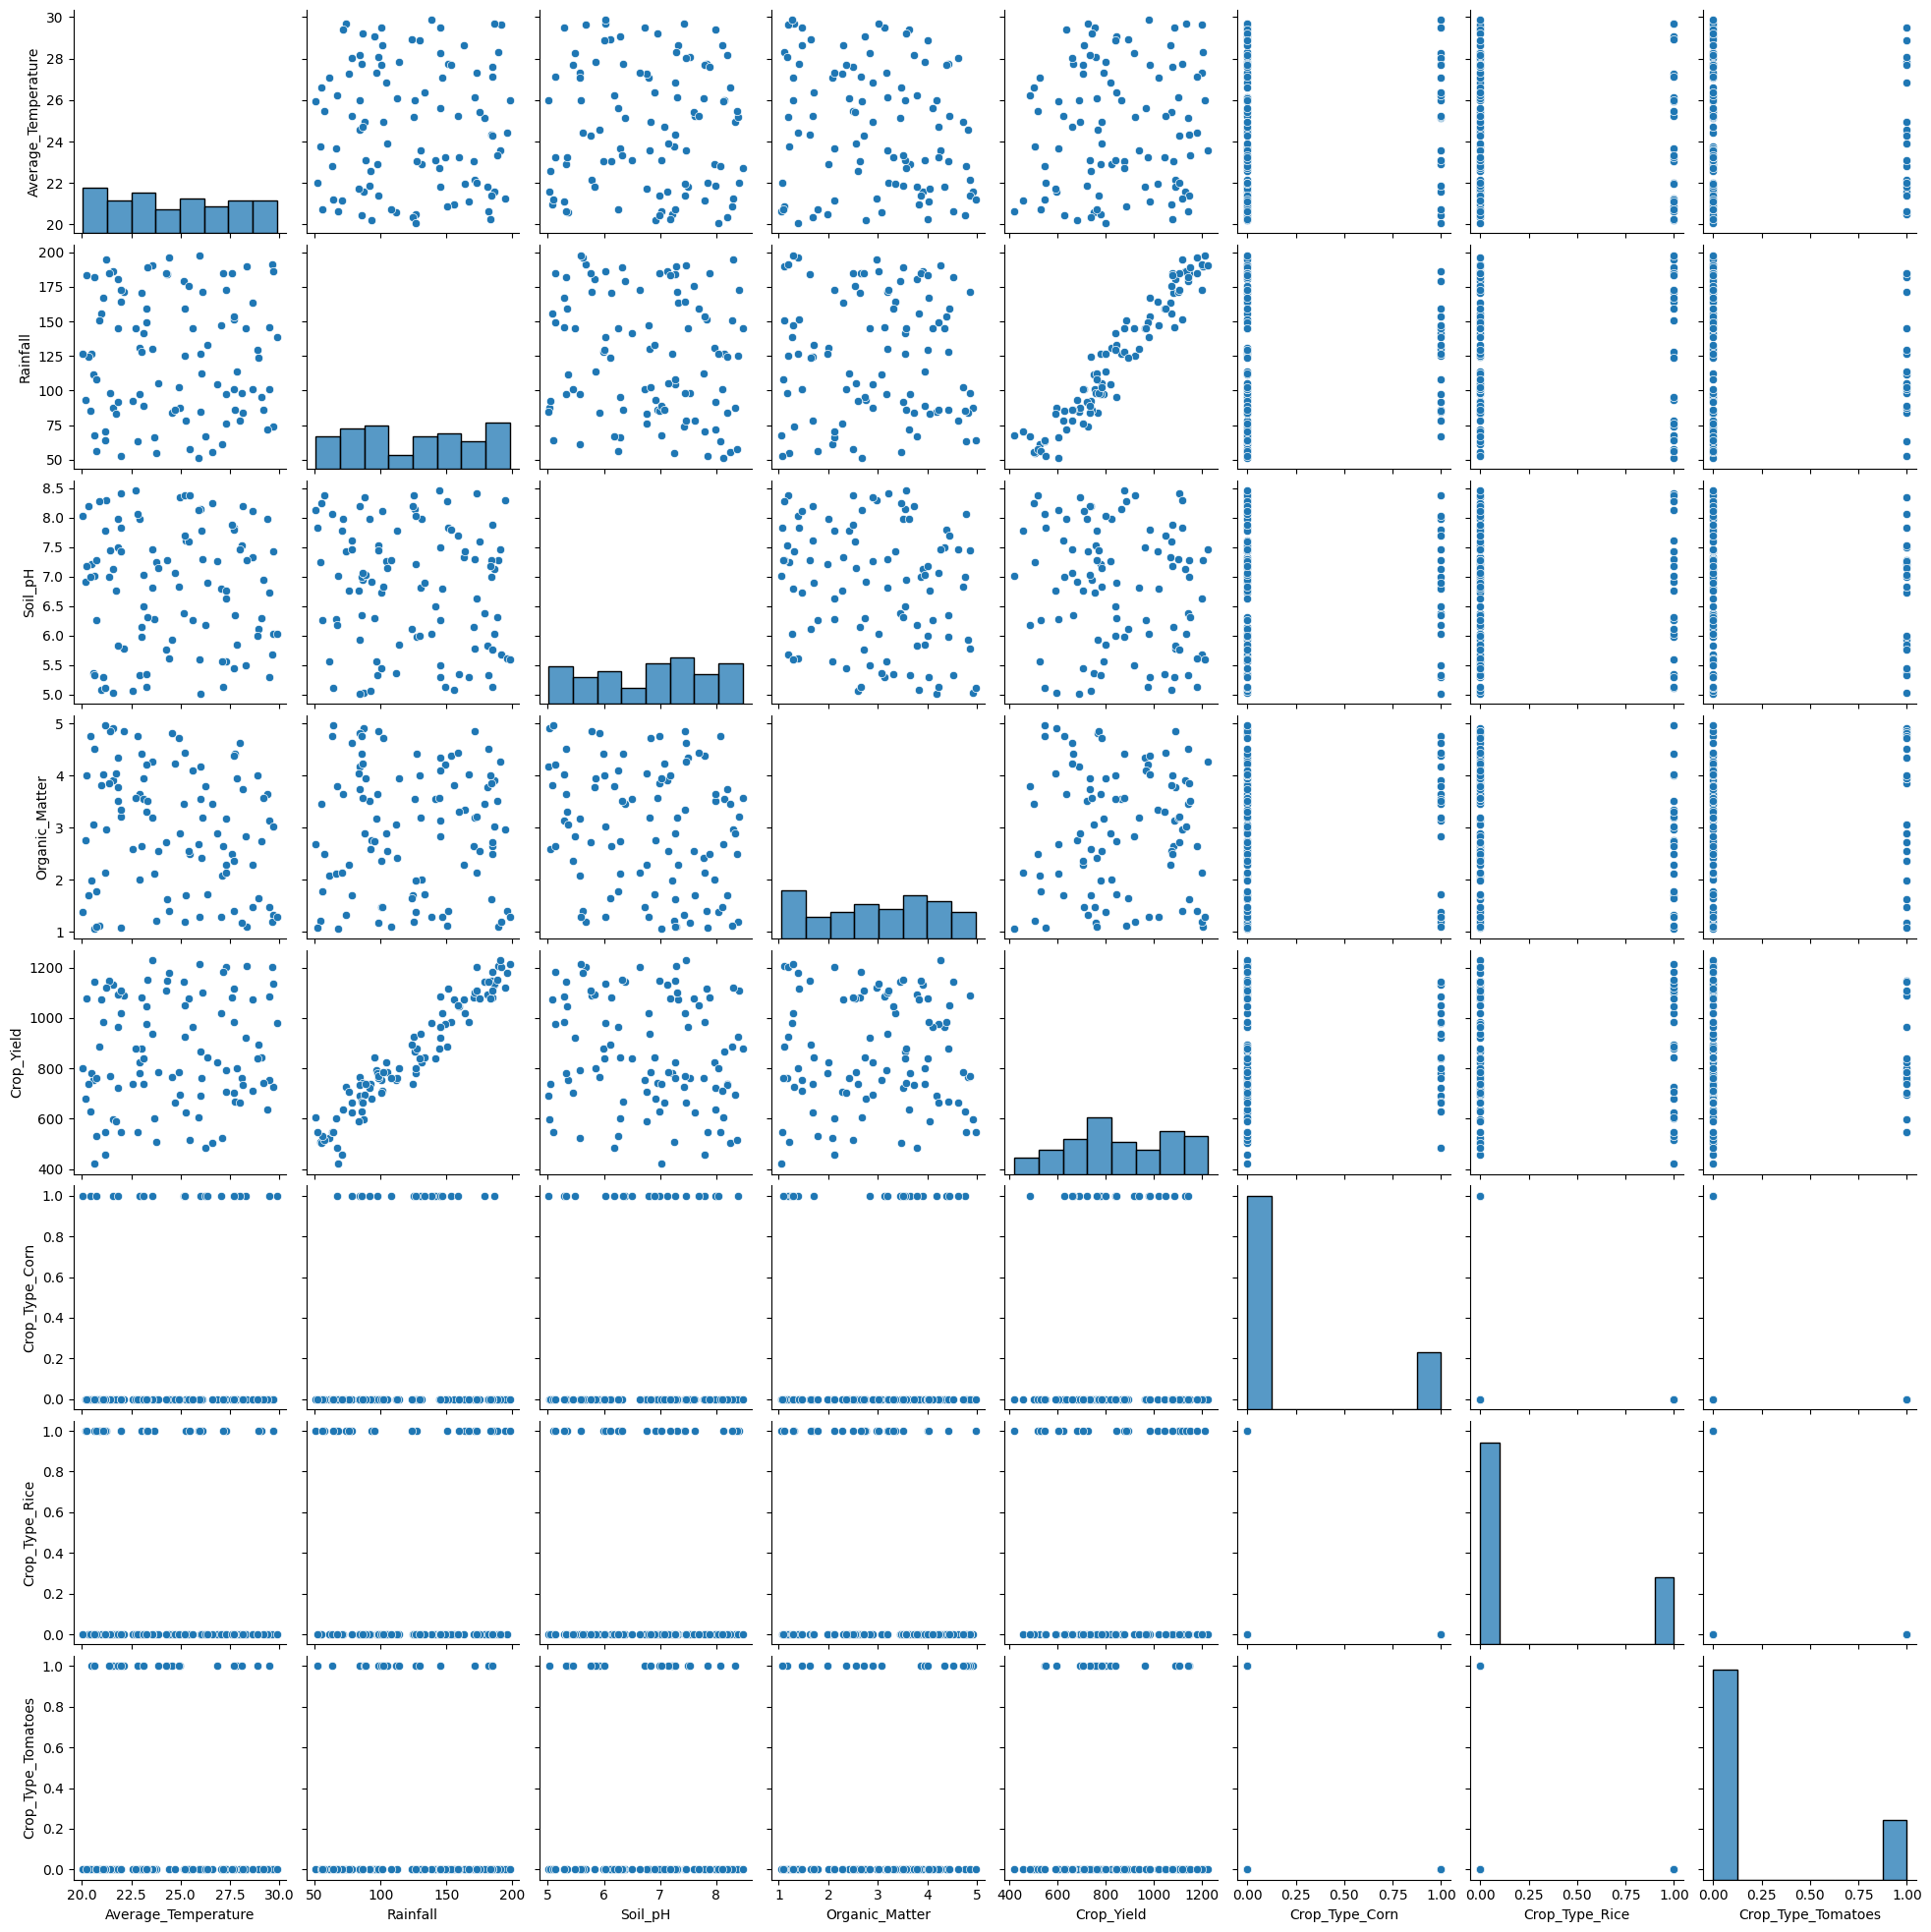

In [32]:
sns.pairplot(data)

<Axes: >

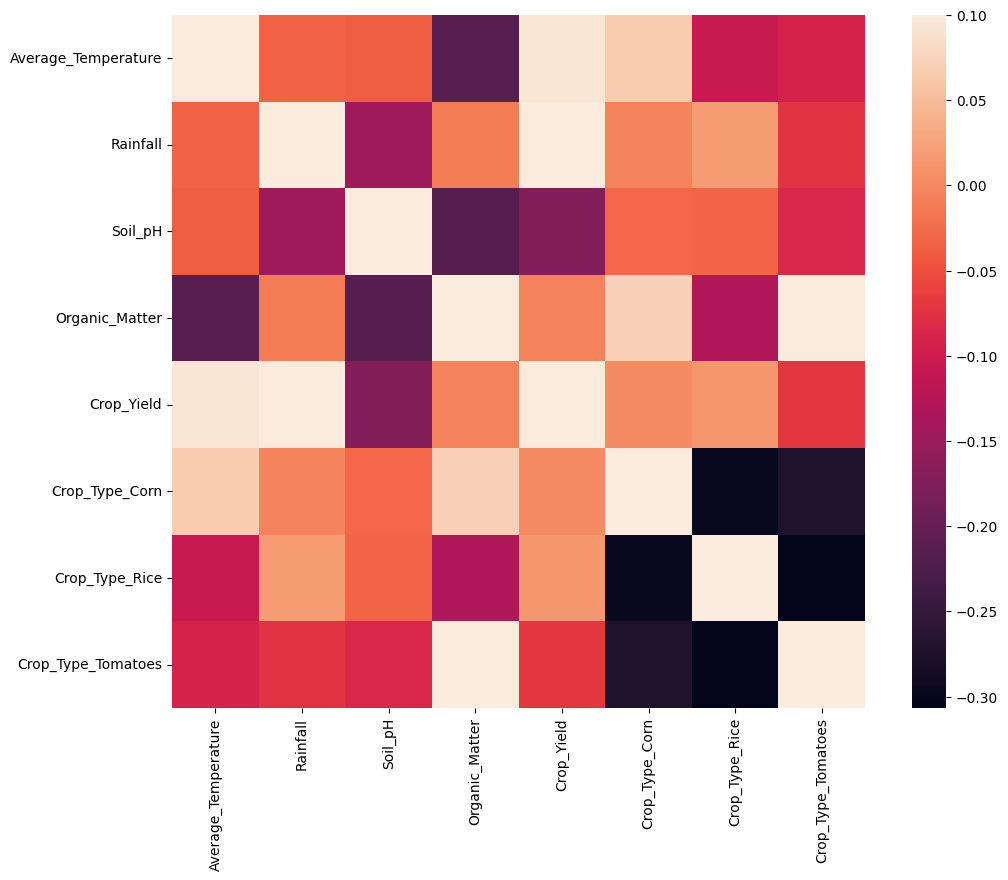

In [33]:
corrmat=data.corr()
f,ax=plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=.1,square=True)

<Axes: >

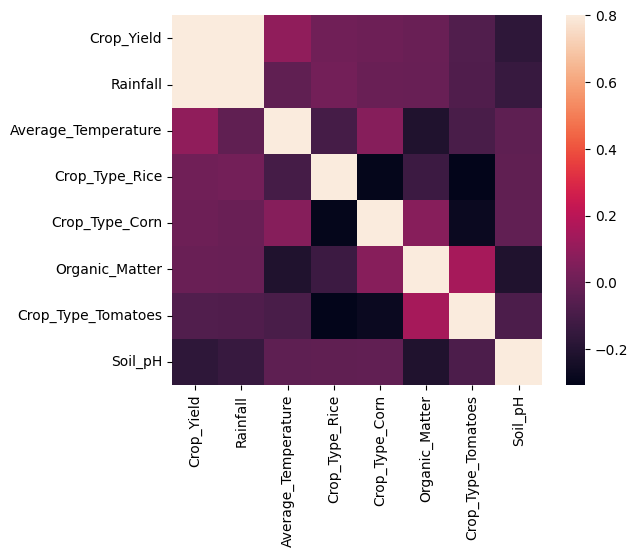

In [34]:
number_of_variables=10
selected_cols=corrmat.nlargest(number_of_variables,'Crop_Yield')['Crop_Yield'].index
correlation_coefficient=np.corrcoef(data[selected_cols].values.T)
sns.heatmap(correlation_coefficient,vmax=.8,square=True,yticklabels=selected_cols.values,xticklabels=selected_cols.values)


In [35]:

AT_corr=data['Rainfall'].corr(data['Crop_Yield'])
AT_corr



0.9639711388857486

In [36]:
AT_corr=data['Average_Temperature'].corr(data['Crop_Yield'])
AT_corr

0.09246325301886596

In [37]:
AT_corr=data['Soil_pH'].corr(data['Crop_Yield'])
AT_corr

-0.17070124754228685

In [38]:
AT_corr=data['Organic_Matter'].corr(data['Crop_Yield'])
AT_corr

-0.006162179264702341

In [45]:

import numpy as np
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=42)

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_valid=\
train_test_split(X,train_size=0.8,random_state=None)

print(X_train.shape)
print(X_valid.shape)

(120, 4)
(30, 4)


In [51]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load or create your dataset (replace this with your data)
data = datasets.load_iris()
X = data.data
y = data.target

# Step 1: Split the dataset into a training set and a test set (e.g., 80% training and 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

# Step 2: Train the model (e.g., using Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)  # Only pass X_train and y_train as arguments

# Step 3: Make predictions using the trained model on the test set
y_pred = model.predict(X_test)

# Step 4: Compare predicted labels with actual labels to calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print ('y pred:', y_pred)
print ('y train:', y_train)


Accuracy: 0.9481481481481482
y pred: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 2 1 0 0 1 2 2 1 2 1 2 2 0 2 1 0 0 0 1 2 0 0 0 1 0 1 2 0 1 2 0 2 2
 1 2 2 1 0 1 2 0 0 1 2 0 2 0 0 2 1 2 2 2 2 1 0 0 2 2 0 0 0 1 2 0 2 2 0 1 1
 2 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0]
y train: [1 2 2 1 2 1 1 2 2 0 1 2 0 1 2]


In [58]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load or create your dataset (replace this with your data)
data = datasets.load_iris()
X = data.data
y = data.target

# Step 1: Split the dataset into a training set and a test set (e.g., 80% training and 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

# Step 2: Train the model (e.g., using Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 3: Make predictions using the trained model on the test set
y_pred = model.predict(X_test)

# Step 4: Compare predicted labels with actual labels to calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9481481481481482
